# Task2.1 图像空间的t-SNE，生成两张图象，一张表示图像空间下的域差异，另一张表示频率空间下的域差异

In [8]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.manifold import TSNE
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
 
folders = [r'G:\FedICRA\data\FAZ\Domain1\train\imgs', r'G:\FedICRA\data\FAZ\Domain2\train\imgs', r'G:\FedICRA\data\FAZ\Domain3\train\imgs',r'G:\FedICRA\data\FAZ\Domain4\train\imgs', r'G:\FedICRA\data\FAZ\Domain5\train\imgs']



'''
获取所有图像的路径以及他们的特征，并将特征压平到（1，40000）的大小
'''
def load_images_from_folders(folders):   
    img_features = []
    img_names = []

    for folder in folders:
        for root, dirs, files in os.walk(folder):
            for file in files:
                if file.endswith(('jpg', 'jpeg', 'png')):
                    img_path = os.path.join(root, file)
                    img = cv2.imread(img_path)
                    # img = cv2.resize(img, (3))  # Resize image if needed
                    img_resize = cv2.resize(img, (200,200))
                    gray_image = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
                    img_features.append(gray_image.flatten())  # Extract image features (flatten as an example)
                    img_names.append(img_path)  # Store image names
    return np.array(img_features), img_names

'''
将经过t-SNE后的数据与他们的图像对应，并绘制在一张图片里
'''
def imscatter(x, y, images, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, image in zip(x, y, images):
        im = cv2.imread(image)
        im = cv2.resize(im, (200, 200))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_f = OffsetImage(im, zoom=zoom)
        ab = AnnotationBbox(im_f, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists
'''
绘制数据的主函数
'''
def draw_tsne(features, imgs):
    print(f">>> t-SNE fitting")
    tsne = TSNE(n_components=2, init='pca', perplexity=30)
    Y = tsne.fit_transform(features)
    print(f"<<< fitting over")

    fig, ax = plt.subplots()
    fig.set_size_inches(50, 30)
    plt.axis('off')
    print(f">>> plotting images")
    imscatter(Y[:, 0], Y[:, 1], imgs, zoom=0.1, ax=ax)  
    print(f"<<< plot over")
    plt.savefig(fname='Task2_1_Image_space.png', format='png')     # 文件保存在了同文件夹下的'Image_space.png'
    plt.show()

>>> t-SNE fitting
<<< fitting over
>>> plotting images
<<< plot over


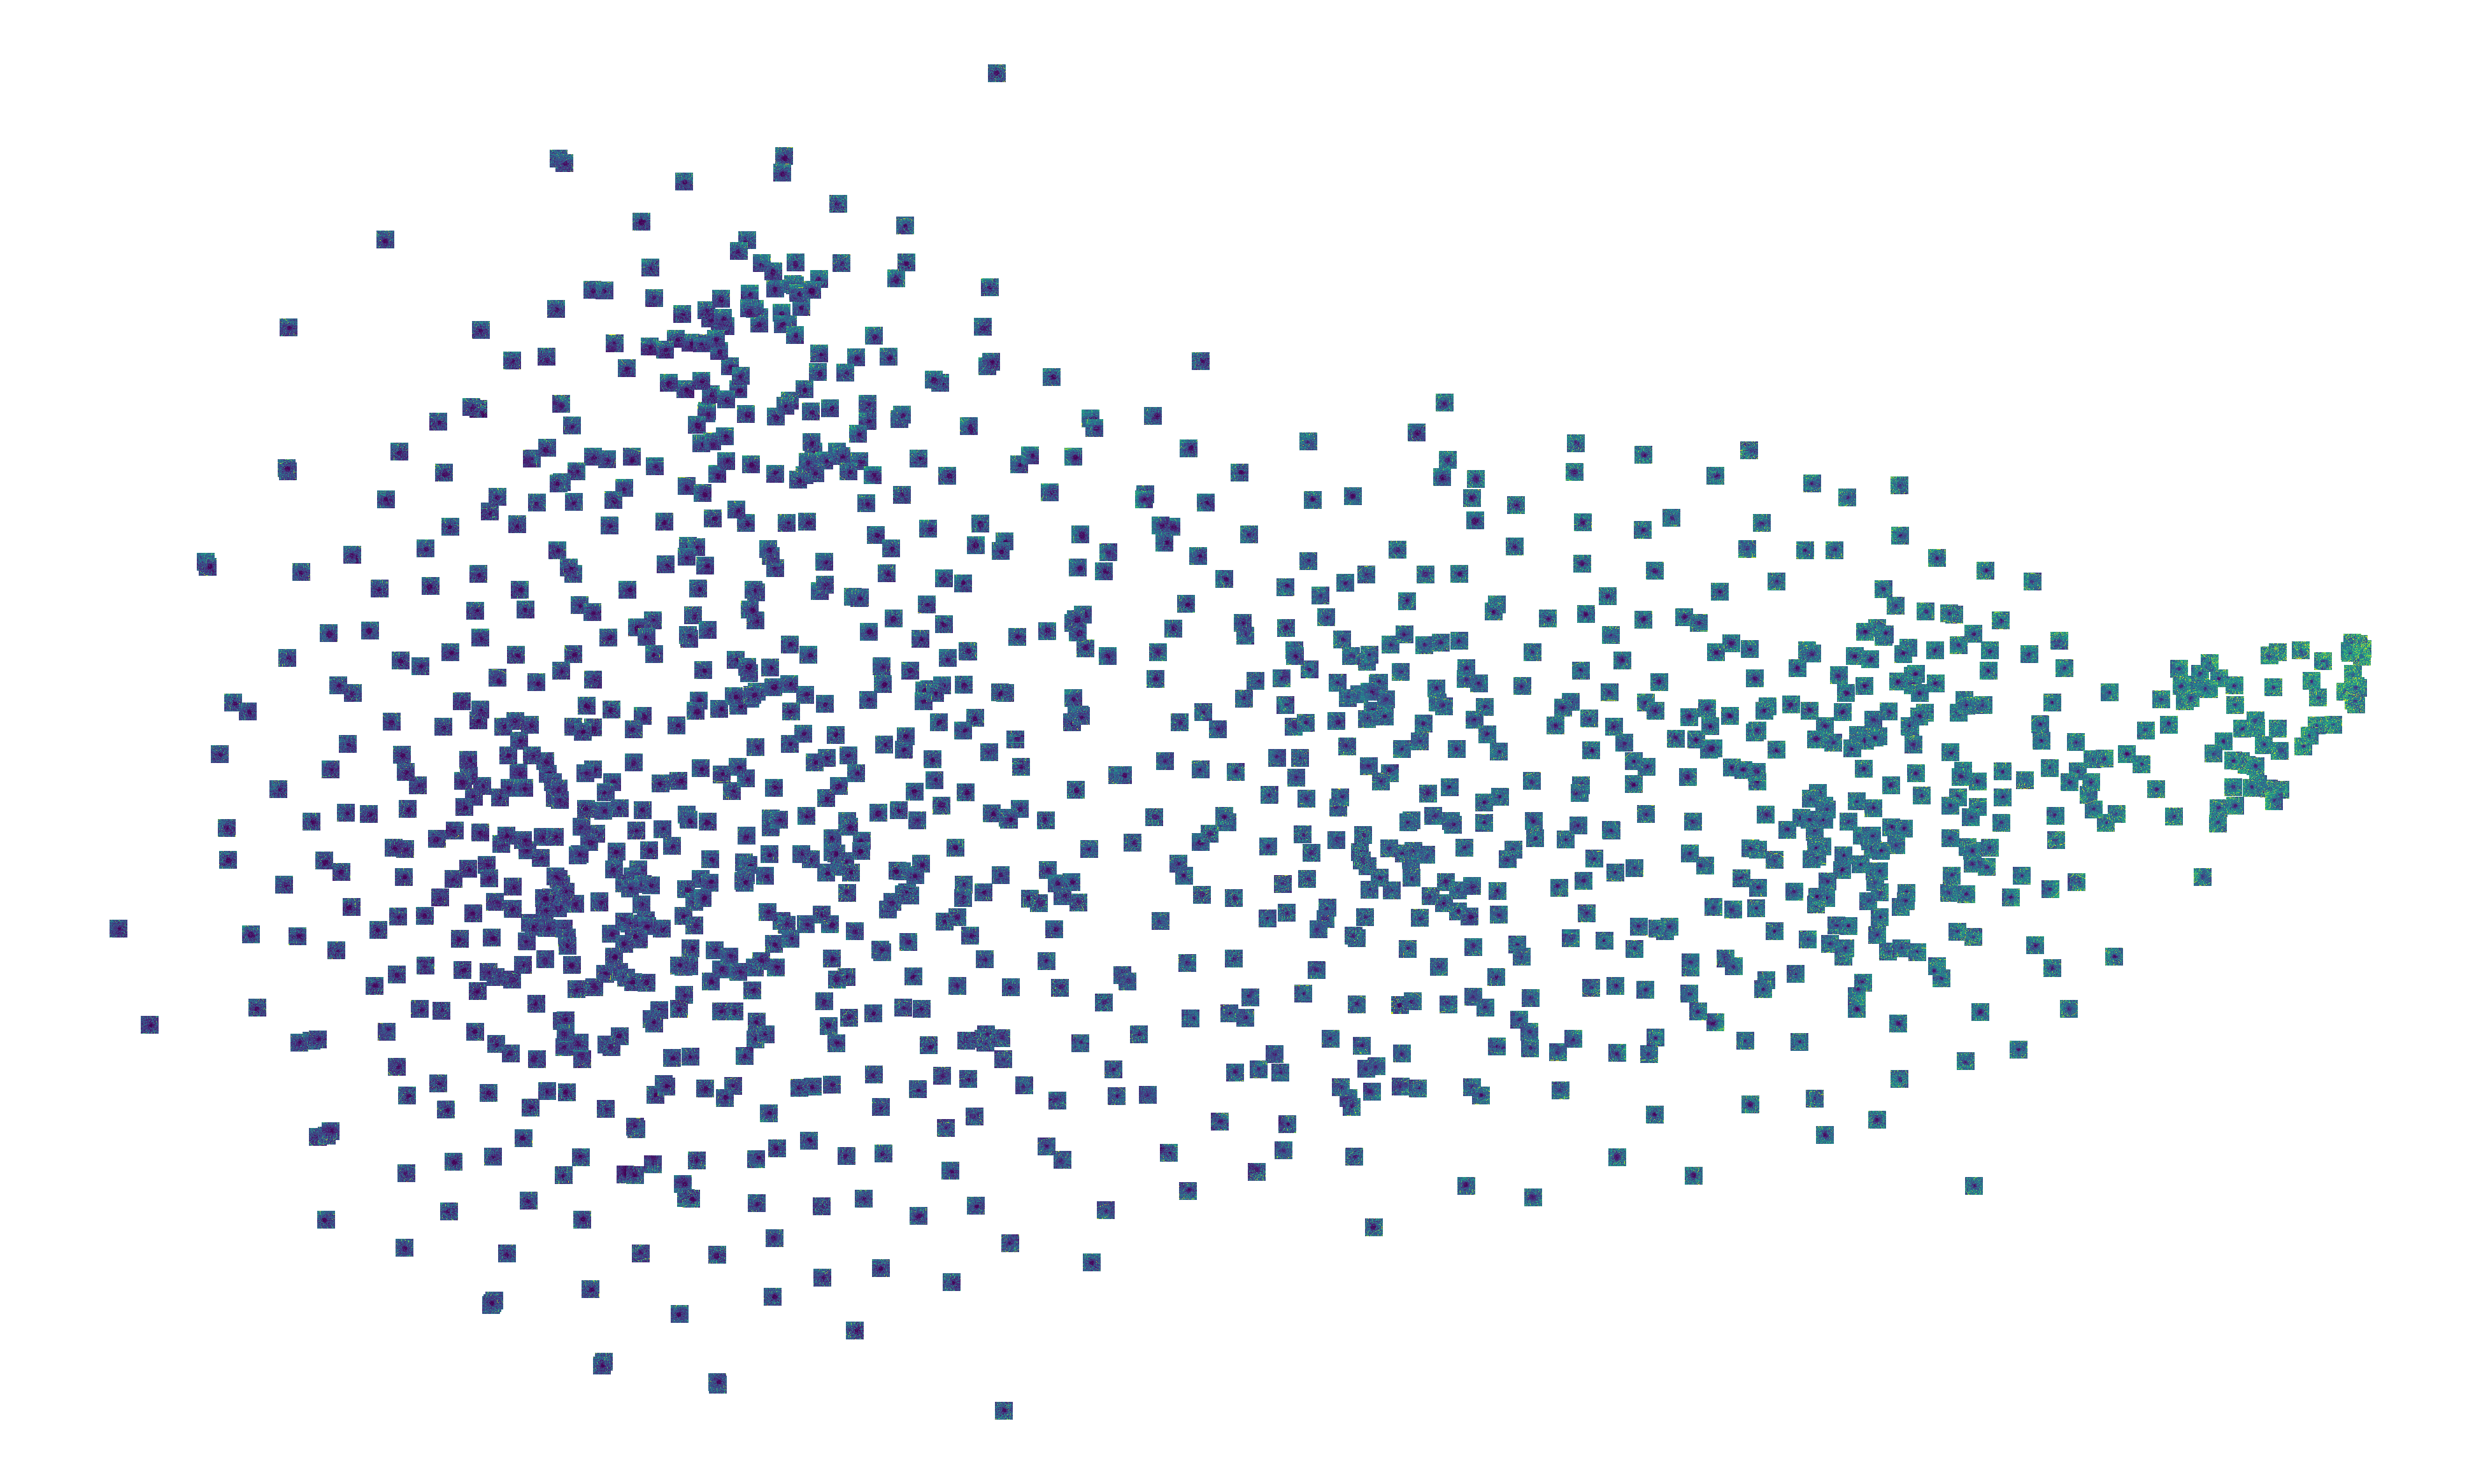

In [9]:
features, img_names = load_images_from_folders(folders)
draw_tsne(features, img_names)

# Task2.1 2D傅里叶变换特征空间的t-SNE

In [10]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from sklearn.manifold import TSNE
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
 
folders = [r'G:\FedICRA\data\FAZ\Domain1\train\imgs', r'G:\FedICRA\data\FAZ\Domain2\train\imgs', r'G:\FedICRA\data\FAZ\Domain3\train\imgs',r'G:\FedICRA\data\FAZ\Domain4\train\imgs', r'G:\FedICRA\data\FAZ\Domain5\train\imgs']




def load_images_from_folders(folders):
    img_features = []
    img_names = []

    for folder in folders:
        for root, dirs, files in os.walk(folder):
            for file in files:
                if file.endswith(('jpg', 'jpeg', 'png')):
                    img_path = os.path.join(root, file)
                    img = cv2.imread(img_path)
                    # img = cv2.resize(img, (3))  # Resize image if needed
                    img_resize = cv2.resize(img, (200,200))
                    gray_image = cv2.cvtColor(img_resize, cv2.COLOR_BGR2GRAY)
                    spect = np.fft.fft2(gray_image)
                    spect_amp = np.abs(spect)
                    img_features.append(spect_amp.flatten())  # Extract image features (flatten as an example)
                    img_names.append(img_path)  # Store image names
    return np.array(img_features), img_names

def imscatter(x, y, images, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0, image in zip(x, y, images):
        im = cv2.imread(image)

        im = cv2.resize(im, (200, 200))
        im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im_f = OffsetImage(im, zoom=zoom)
        ab = AnnotationBbox(im_f, (x0, y0), xycoords='data', frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

def draw_tsne(features, imgs):
    print(f">>> t-SNE fitting")
    tsne = TSNE(n_components=2, init='pca', perplexity=30)
    Y = tsne.fit_transform(features)
    print(f"<<< fitting over")

    fig, ax = plt.subplots()
    fig.set_size_inches(50, 30)
    plt.axis('off')
    print(f">>> plotting images")
    print(Y.shape)
    imscatter(Y[:, 0], Y[:, 1], imgs, zoom=0.1, ax=ax)  
    print(f"<<< plot over")
    plt.savefig(fname='Task2_1_2Dfourier_transform.png', format='png')   # 存储在了同文件夹下的'2Dfourier_transform.png'文件
    plt.show()


>>> t-SNE fitting
<<< fitting over
>>> plotting images
(1332, 2)
<<< plot over


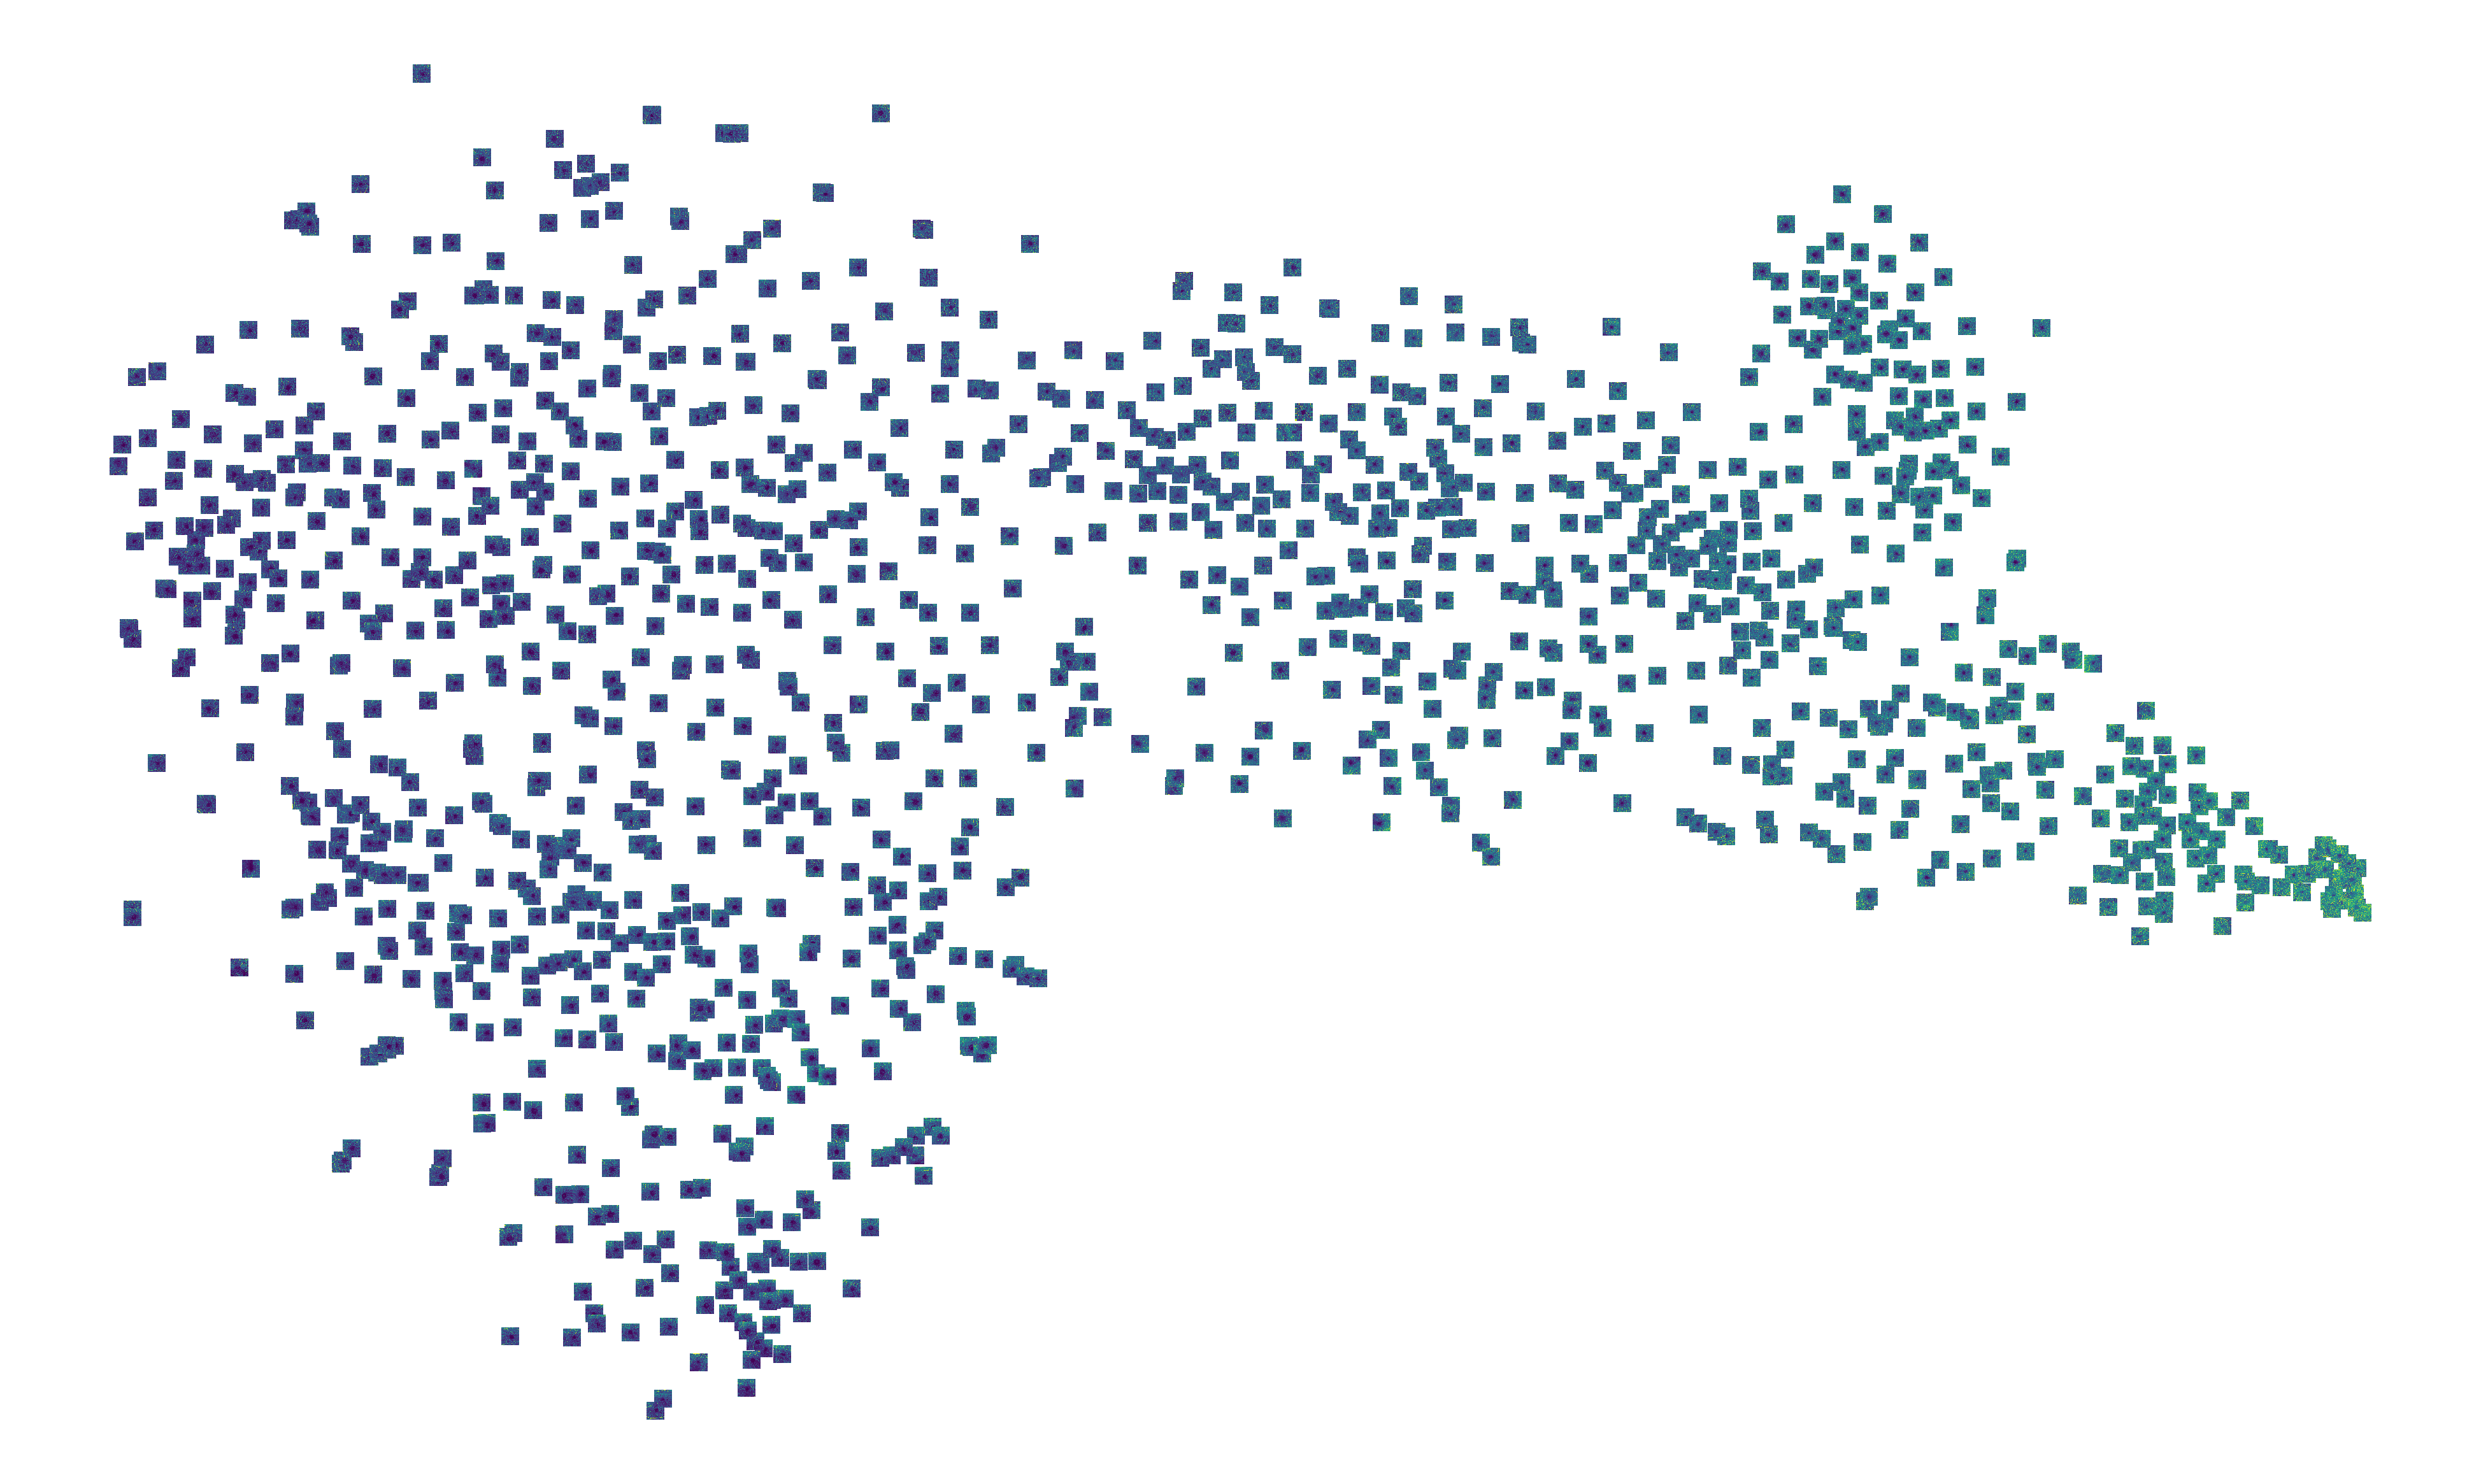

In [11]:
features, img_names = load_images_from_folders(folders)
draw_tsne(features, img_names)